<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/regression/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 参考文献
# https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

# ロジスティック回帰は、説明変数の情報にもとづいて

# データがどのクラスに属するかを予測・分類する（例：ある顧客が商品を買うか買わないかを識別する）
# 注目している出来事が発生する確率を予測する（例：ある顧客が何％の確率で商品を買うか予測する）
# ために利用されるモデル

In [2]:
import seaborn as sns
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


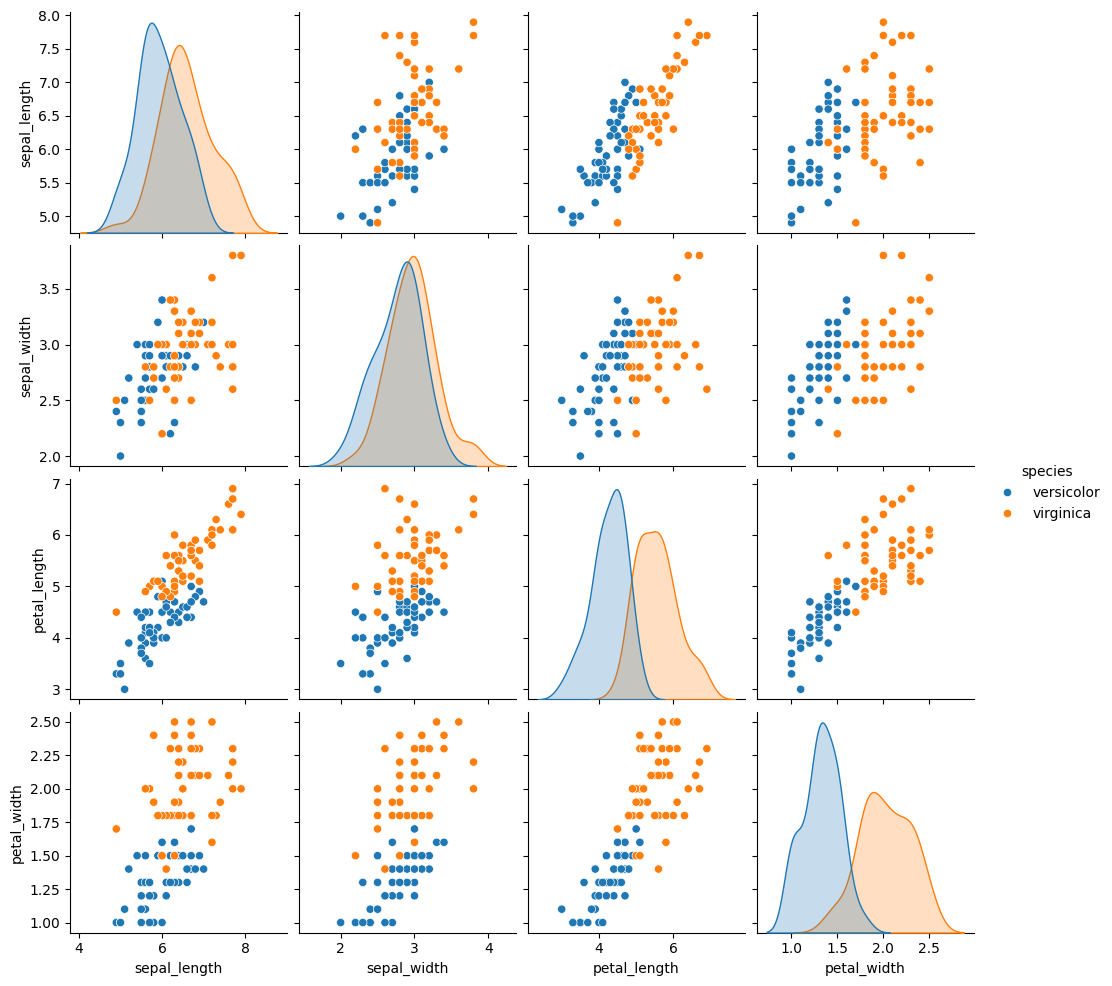

In [3]:
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue='species')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']] # 説明変数
Y = iris_df['species'].map({'versicolor': 0, 'virginica': 1}) # versicolorをクラス0, virginicaをクラス1とする
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

# coefficient =  [[0.73642001]]
# intercept =  [-3.39483004]

Y_pred = lr.predict(X_test)
print(Y_pred)



coefficient =  [[3.43226141]]
intercept =  [-16.54478884]
[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))



confusion matrix = 
 [[ 7  3]
 [ 0 10]]
accuracy =  0.85
precision =  0.7692307692307693
recall =  1.0
f1 score =  0.8695652173913043


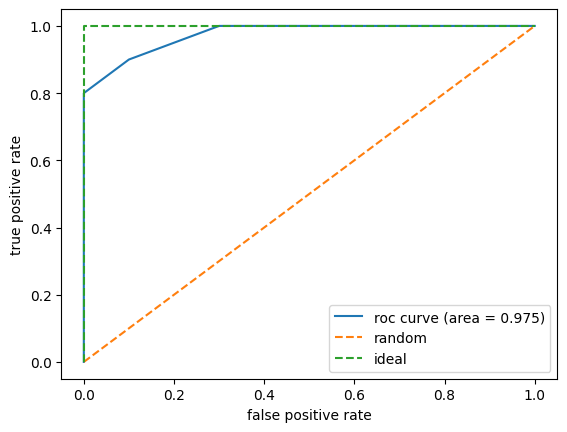

In [7]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [8]:
from sklearn.metrics import roc_auc_score
print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))

auc =  0.975
